In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

# https://analyzingalpha.com/yfinance-python

In [2]:
goog = yf.Ticker('goog')
data = goog.history()
data.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-03-17 00:00:00-04:00,100.839996,103.489998,100.750000,102.459999,76109100,0.0,0.0
2023-03-20 00:00:00-04:00,101.059998,102.580002,100.790001,101.930000,26033900,0.0,0.0
2023-03-21 00:00:00-04:00,101.980003,105.959999,101.860001,105.839996,33122800,0.0,0.0
2023-03-22 00:00:00-04:00,105.139999,107.510002,104.209999,104.220001,32336900,0.0,0.0
2023-03-23 00:00:00-04:00,105.889999,107.099998,105.410004,106.260002,30450822,0.0,0.0


<Axes: xlabel='Date', ylabel='Open'>

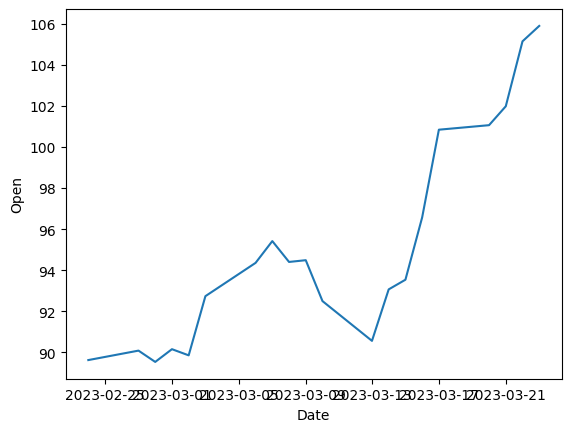

In [3]:


sns.lineplot(x="Date", y="Open", data=data)

---
## I need all companies from SP500

### Use Pandas to get the table from wikipedia (Beautifulsoup for web scrapping is using in backend)

---

In [4]:
import os 

path = './data/'
isExist = os.path.exists(path+'sp500list.csv')

want_save = True

if isExist:
    sp500 = pd.read_csv('./data/sp500list.csv')
else:
    url =  'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    sp500_all = pd.read_html(url)
    sp500 = sp500_all[0]

    if want_save:
        # Save
        os.makedirs(path)
        sp500.to_csv(path+'sp500list.csv', index=False)
    

sp500

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


---
### Get data from yfinance

---

In [5]:
# sp500_cap_by_month = yf.download('SPY', start='2000-01-01', end='2023-03-20')
# sp500_cap_by_day = yf.download('SPY', start='2000-01-01', end='2023-03-20',interval = "1d")

sp500_cap_by_month = yf.download('SPY', period = "23y")
sp500_cap_by_day = yf.download('SPY', period = "23y",interval = "1d")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
sp500_cap_by_day.reset_index(inplace=True)
sp500_cap_by_day["d"] = sp500_cap_by_day["Date"].copy()
sp500_cap_by_day.rename(columns={"d":"Date", "Date":"d"},inplace=True)
sp500_cap_by_day.set_index("Date", inplace=True)
sp500_cap_by_day.rename(columns={"d":"Date"}, inplace=True)
sp500_cap_by_day

# -----------------------------------------------------------------------
sp500_cap_by_month.reset_index(inplace=True)
sp500_cap_by_month["d"] = sp500_cap_by_month["Date"].copy()
sp500_cap_by_month.rename(columns={"d":"Date", "Date":"d"},inplace=True)
sp500_cap_by_month.set_index("Date", inplace=True)
sp500_cap_by_month.rename(columns={"d":"Date"}, inplace=True)
sp500_cap_by_month


,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2000-03-24,2000-03-24,152.875000,155.750000,151.718750,153.562500,100.505486,11462900
2000-03-27,2000-03-27,153.375000,153.781250,151.812500,151.937500,99.441956,8798600
2000-03-28,2000-03-28,151.250000,152.984375,150.593750,151.062500,98.869278,6334400
2000-03-29,2000-03-29,151.562500,152.484375,149.656250,151.218750,98.971535,6747500
2000-03-30,2000-03-30,150.156250,151.921875,147.125000,148.687500,97.314857,9491900
...,...,...,...,...,...,...,...
2023-03-17,2023-03-17,393.220001,394.399994,388.549988,389.989990,389.989990,140047400
2023-03-20,2023-03-20,390.799988,394.170013,390.070007,393.739990,393.739990,93055800
2023-03-21,2023-03-21,397.239990,399.410004,395.579987,398.910004,398.910004,91524200


In [7]:
sp500_cap_by_day.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2000-03-24,2000-03-24,152.87500,155.750000,151.71875,153.56250,100.505524,11462900
2000-03-27,2000-03-27,153.37500,153.781250,151.81250,151.93750,99.441978,8798600
2000-03-28,2000-03-28,151.25000,152.984375,150.59375,151.06250,98.869293,6334400
2000-03-29,2000-03-29,151.56250,152.484375,149.65625,151.21875,98.971558,6747500
2000-03-30,2000-03-30,150.15625,151.921875,147.12500,148.68750,97.314835,9491900


---


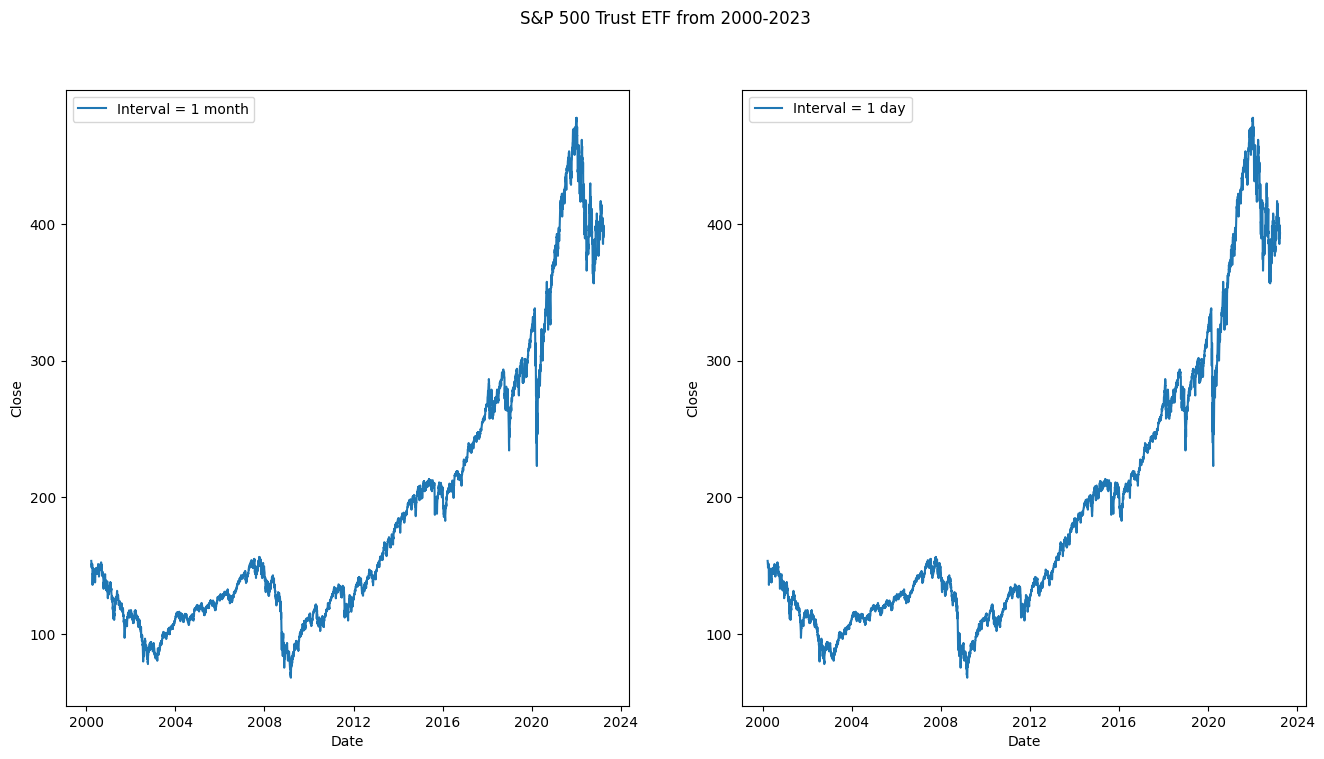

In [8]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
sns.lineplot(ax=ax[0], x="Date", y="Close", data=sp500_cap_by_month, label="Interval = 1 month")
sns.lineplot(ax=ax[1],x="Date", y="Close", data=sp500_cap_by_day, label="Interval = 1 day")
plt.suptitle("S&P 500 Trust ETF from 2000-2023")
plt.show()

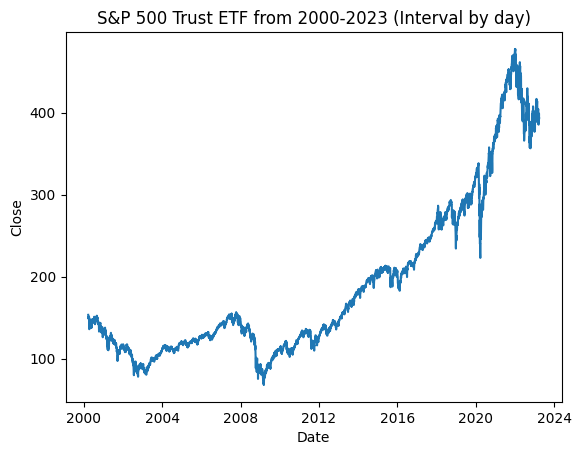

In [9]:
sns.lineplot(x="Date", y="Close", data=sp500_cap_by_day)
plt.title("S&P 500 Trust ETF from 2000-2023 (Interval by day)")
plt.show()

---
### Dot-com bubble

---


In [10]:
dot_com_bubble = sp500_cap_by_day['2000-01-01':'2004-01-01']
dot_com_bubble.head()


,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2000-03-24,2000-03-24,152.87500,155.750000,151.71875,153.56250,100.505524,11462900
2000-03-27,2000-03-27,153.37500,153.781250,151.81250,151.93750,99.441978,8798600
2000-03-28,2000-03-28,151.25000,152.984375,150.59375,151.06250,98.869293,6334400
2000-03-29,2000-03-29,151.56250,152.484375,149.65625,151.21875,98.971558,6747500
2000-03-30,2000-03-30,150.15625,151.921875,147.12500,148.68750,97.314835,9491900


In [11]:
# mask = dot_com_bubble['Close'].min()==dot_com_bubble['Close']
# dot_com_bubble[mask]
min_date = dot_com_bubble.loc[dot_com_bubble['Close'].idxmin(), 'Date']
min_date

Timestamp('2002-10-09 00:00:00')

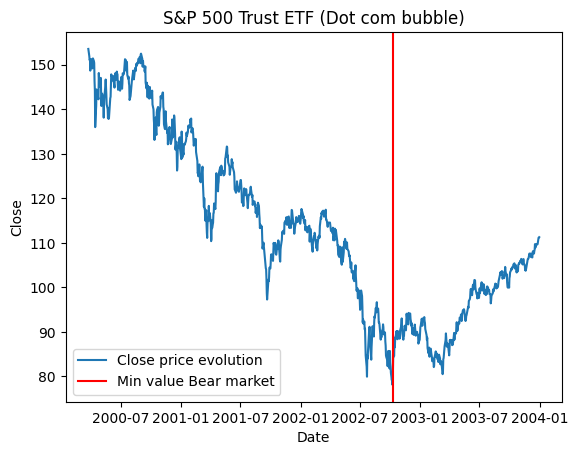

In [12]:
sns.lineplot(x="Date", y="Close", data=dot_com_bubble, label="Close price evolution")
plt.axvline(x=min_date, label="Min value Bear market", color='red')
plt.title("S&P 500 Trust ETF (Dot com bubble)")
plt.legend()
plt.show()

---
### Subprime crisis

---

In [13]:
subprime_bubble = sp500_cap_by_day['2006-01-01':'2010-01-01']
min_date_sp = subprime_bubble.loc[subprime_bubble['Close'].idxmin(), 'Date']
max_date_sp = subprime_bubble.loc[subprime_bubble['Close'].idxmax(), 'Date']
print("min stock value in subprime crisis",min_date_sp)
print("max stock value in subprime crisis",max_date_sp)

min stock value in subprime crisis 2009-03-09 00:00:00
max stock value in subprime crisis 2007-10-09 00:00:00


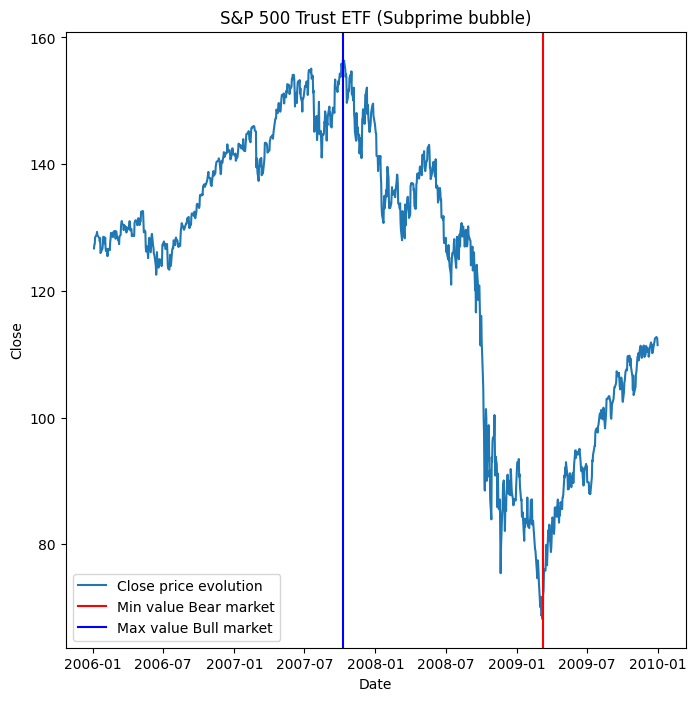

In [14]:

fig, ax = plt.subplots(figsize=(8,8))
g = sns.lineplot(x="Date", y="Close", data=subprime_bubble, label="Close price evolution", ax=ax)
ax.axvline(x=min_date_sp, label="Min value Bear market", color='red')
plt.axvline(x=max_date_sp, label="Max value Bull market", color='blue')
plt.title("S&P 500 Trust ETF (Subprime bubble)")
plt.legend()

plt.show()

---
### Covid pandemic

---

In [24]:
sep = "--------------------------------------------------------------------------------"

In [28]:
covid_pandemic = sp500_cap_by_day['2019-01-01':'2022-01-01']
pre_covid = sp500_cap_by_day['2018-01-01':'2019-12-31']


min_date_covid = covid_pandemic.loc[covid_pandemic['Close'].idxmin(), 'Date']
max_date_covid = covid_pandemic.loc[covid_pandemic['Close'].idxmax(), 'Date']

min_price_covid = covid_pandemic['Close'].min()
max_price_covid = covid_pandemic['Close'].max()
print(sep)
print("Date of min stock value across Covid pandemic --> ",min_date_covid)
print("Date of max stock value across and far beyonf Covid pandemic --> ",max_date_covid)
print("min stock value across Covid pandemic --> ",min_price_covid)
print("max stock value across Covid pandemic --> ",max_price_covid)
print(sep)


max_date_pre_covid = pre_covid.loc[pre_covid['Close'].idxmax(), 'Date']
max_price_pre_covid = pre_covid['Close'].max()
print("max price pre-pandemic --> ", max_price_pre_covid)
print(sep)
print("Delta variation (price loss) --> ", min_price_covid-max_price_pre_covid)
print("Delta variation % (price loss) --> ", round(100*(min_price_covid-max_price_pre_covid)/max_price_pre_covid, 2))


--------------------------------------------------------------------------------
Date of min stock value across Covid pandemic -->  2020-03-23 00:00:00
Date of max stock value across and far beyonf Covid pandemic -->  2021-12-29 00:00:00
min stock value across Covid pandemic -->  222.9499969482422
max stock value across Covid pandemic -->  477.4800109863281
--------------------------------------------------------------------------------
max price pre-pandemic -->  322.94000244140625
--------------------------------------------------------------------------------
Delta variation (price loss) -->  -99.99000549316406
Delta variation % (price loss) -->  -30.96


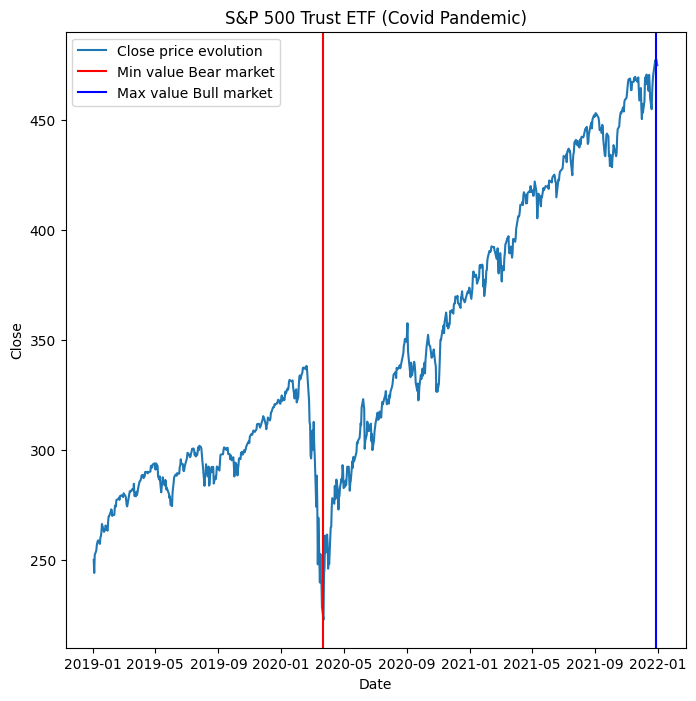

In [17]:
fig, ax = plt.subplots(figsize=(8,8))
g = sns.lineplot(x="Date", y="Close", data=covid_pandemic, label="Close price evolution", ax=ax)
ax.axvline(x=min_date_covid, label="Min value Bear market", color='red')
plt.axvline(x=max_date_covid, label="Max value Bull market", color='blue')
plt.title("S&P 500 Trust ETF (Covid Pandemic)")
plt.legend()

plt.show()

---
## Al together

---

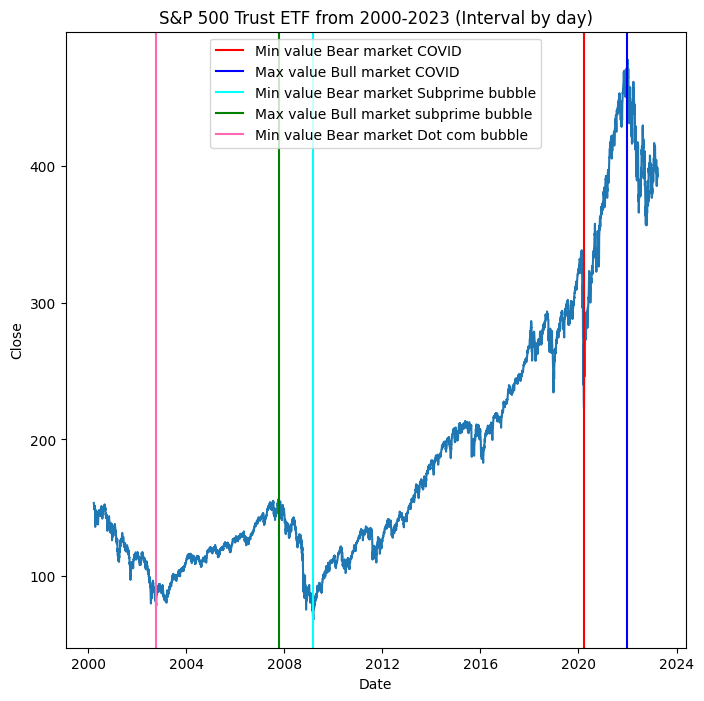

In [22]:
fig, ax = plt.subplots(figsize=(8,8))
g = sns.lineplot(x="Date", y="Close", data=sp500_cap_by_day, ax=ax)
plt.title("S&P 500 Trust ETF from 2000-2023 (Interval by day)")

ax.axvline(x=min_date_covid, label="Min value Bear market COVID", color='red')
ax.axvline(x=max_date_covid, label="Max value Bull market COVID", color='blue')
ax.axvline(x=min_date_sp, label="Min value Bear market Subprime bubble", color='cyan')
ax.axvline(x=max_date_sp, label="Max value Bull market subprime bubble", color='green')
ax.axvline(x=min_date, label="Min value Bear market Dot com bubble", color='hotpink')
plt.legend()
plt.show()

---
### Sp500 companies by sector

---


In [30]:
sector = sp500['GICS Sub-Industry'].unique().tolist()

In [32]:
companies_by_sector = {}
for s in sector:
    companies_by_sector[s] = list(sp500.loc[sp500['GICS Sub-Industry'] == s, 'Symbol'])

companies_by_sector
    

{'Industrial Conglomerates': ['MMM', 'GE', 'HON'],
 'Building Products': ['AOS', 'ALLE', 'CARR', 'FAST', 'JCI', 'MAS', 'TT'],
 'Health Care Equipment': ['ABT',
  'A',
  'BAX',
  'BDX',
  'BSX',
  'DHR',
  'DXCM',
  'EW',
  'HOLX',
  'IDXX',
  'PODD',
  'ISRG',
  'MDT',
  'PKI',
  'RMD',
  'STE',
  'SYK',
  'TFX',
  'ZBH'],
 'Pharmaceuticals': ['ABBV',
  'BMY',
  'CTLT',
  'LLY',
  'JNJ',
  'MRK',
  'OGN',
  'PFE',
  'VTRS',
  'ZTS'],
 'IT Consulting & Other Services': ['ACN', 'CTSH', 'DXC', 'EPAM', 'IT', 'IBM'],
 'Interactive Home Entertainment': ['ATVI', 'EA', 'TTWO'],
 'Agricultural Products & Services': ['ADM', 'BG'],
 'Application Software': ['ADBE',
  'ANSS',
  'ADSK',
  'CDNS',
  'CDAY',
  'FICO',
  'GEN',
  'INTU',
  'ORCL',
  'PAYC',
  'PTC',
  'CRM',
  'SNPS',
  'TYL'],
 'Human Resource & Employment Services': ['ADP', 'PAYX', 'RHI'],
 'Automotive Retail': ['AAP', 'KMX'],
 'Independent Power Producers & Energy Traders': ['AES', 'NRG'],
 'Life & Health Insurance': ['AFL', 'GL', 

In [37]:
import os 

def save_companies_sector(sector, companies_by_sector):
    all_comp = companies_by_sector[sector]
    
    path = './data/all_tickers/'+sector+"/"       
    isExist = os.path.exists(path)
    if not isExist:
        os.makedirs(path)


    for c in all_comp:
        df = yf.download(c, period = "23y")
        df.to_csv(path+c+".csv")
    
    


    

    
    

In [38]:
for s in sector:
    save_companies_sector(s, companies_by_sector)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:
posibilities = ['Health Care Equipment','Pharmaceuticals','IT Consulting & Other Services',
'Application Software','Life & Health Insurance','Internet Services & Infrastructure',
'Passenger Airlines','Health Care Supplies','Interactive Media & Services', 'Internet & Direct Marketing Retail'
'Semiconductors','Biotechnology','Oil & Gas Exploration & Production']